In [1]:
import sys
sys.path.append('..//')

In [2]:
'..//' not in sys.path

False

Full sphere generation
cap method area sum 12.541187607647998
expected area sum 6.283185307179586
plot exc arrow


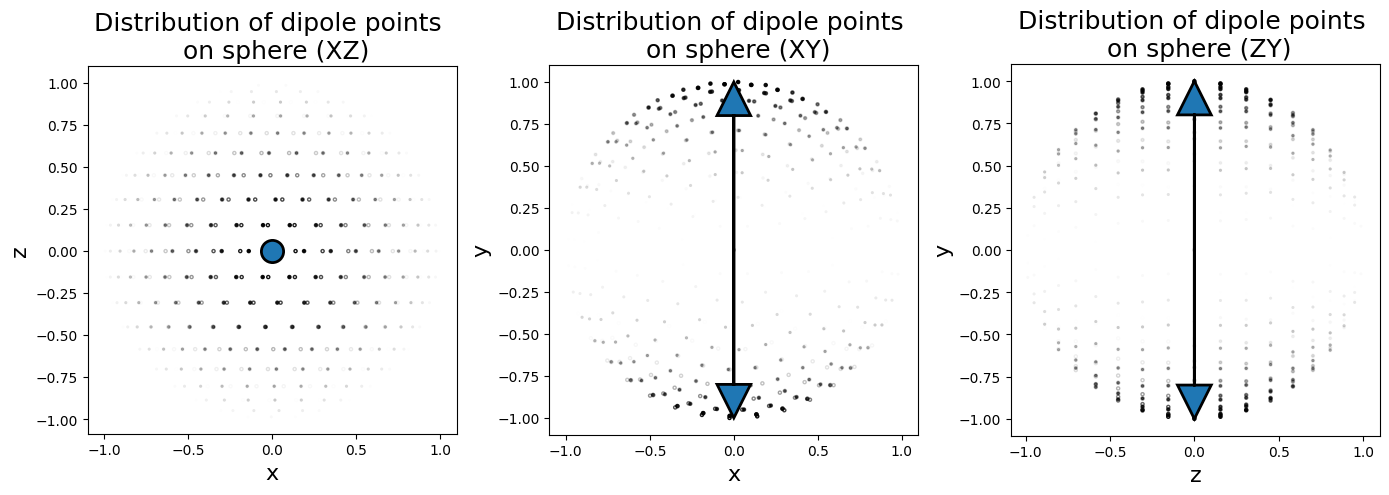

In [5]:
from opmsim import dipole_source
import numpy as np

source = dipole_source.DipoleSource()
## source.add_dipoles((0,0))
source.generate_dipoles(500)
source.classical_photoselection((np.pi/2,0))



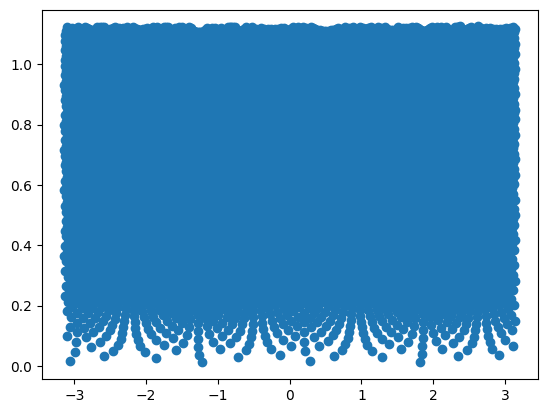

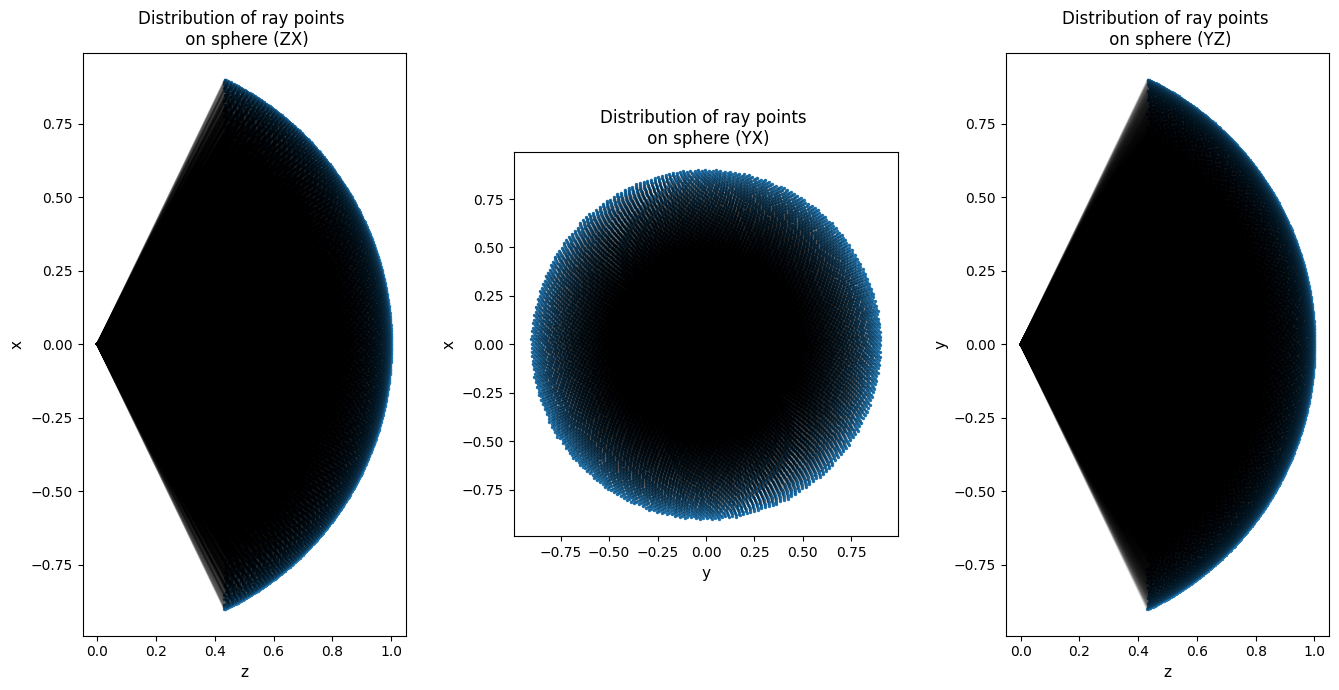

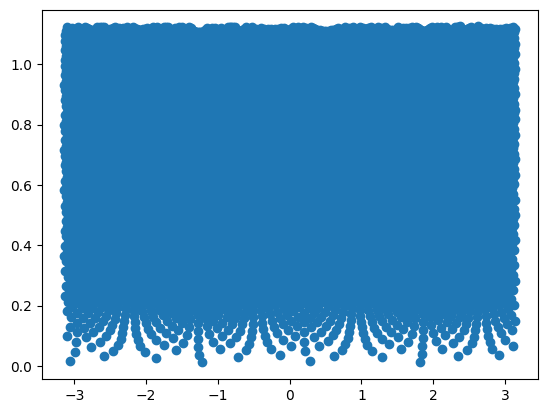

n_dipoles 1
n_rays 8530
pvec shape (1, 1, 3)
nvec shape (1, 8530, 3)
(1, 8530, 3, 1)
(1, 1, 1, 1)
initial energy shape ()


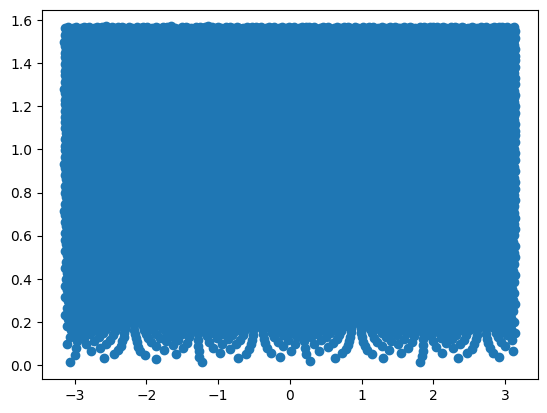

n_dipoles 1
n_rays 14999
pvec shape (1, 1, 3)
nvec shape (1, 14999, 3)
(1, 14999, 3, 1)
(1, 1, 1, 1)
initial energy shape ()
n rays 2pi =  14999
(8530, 3, 1)
n rays =  8530
NA area vs real area? 3.573866173115898 3.5738661731158983
half_sphere_energy 4.188720376376996
initial_energy 1.6471446499530358
rays when NA scaled up to hemisphere 14996.524232890968
initialisation time in system 21.965329s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000269E23808E0>
CURVED REFRACTION
max rho curved 0.0027067136852832515
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000269DE0C2CD0>
max rho flat 0.0035999292014267247
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000269DD268C40>
CURVED REFRACTION
max rho curved -4.111911183336728e-05
ELEMENT: <opmsim.optical_elements.LinearPolariser object at 0x00000269DCFC66D0>
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000269DD1F5550>
Saved checkpoint with 10000 rays
max rho flat -4.111911

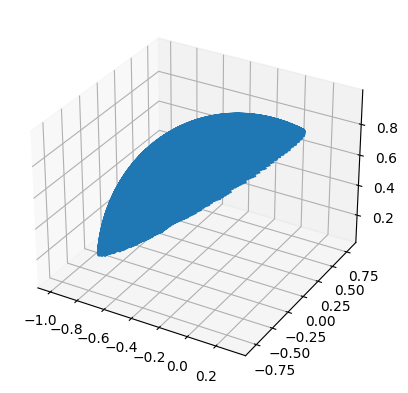

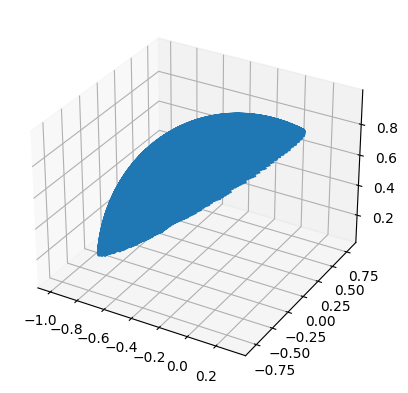

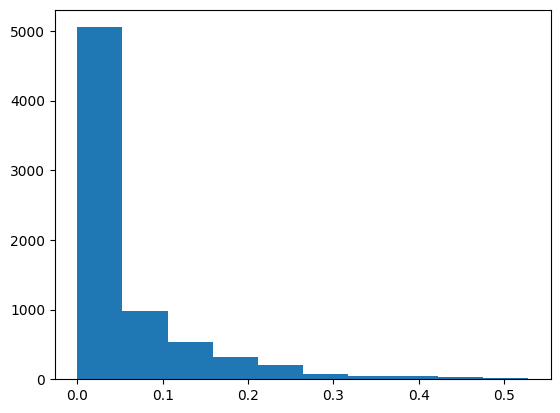

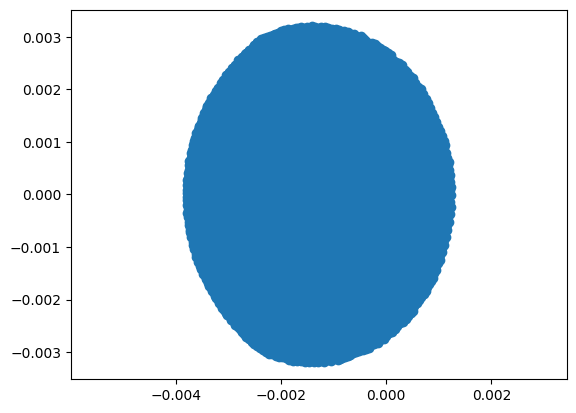

AUTOSCALING 5 TICKS


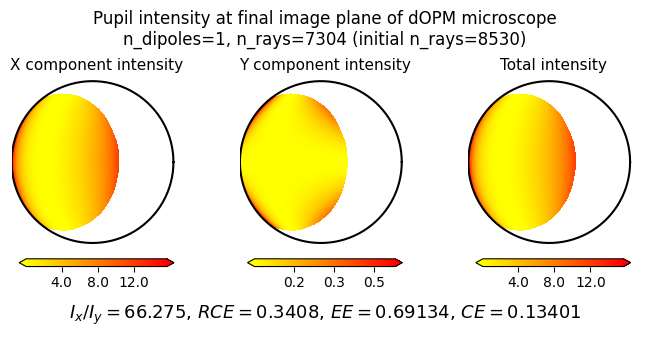

In [8]:
import sys

if '..//' not in sys.path:
    sys.path.append('..//')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys

%matplotlib inline 
#notebook

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 50

options = {
    'ray_count': 15000,
    'draw_rays': False,
    'max_rays_stored': 10000,
    'ray_dist': 'fibonacci'
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'pupil_boundary_radius': 0,
    'scale_range': None# [0,0.3]
}

opm_angle = 35*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
O2_mirr = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1, update_history=True)#,trace_after=False)

TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33, y_axis_rotation=opm_angle)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)

diag = optical_elements.DiagonalMatrix(-1)

HWP = optical_elements.WavePlate(np.pi/4, np.pi)
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)
QWP2 = optical_elements.WavePlate(-np.pi/4, np.pi/2)

LP = optical_elements.LinearPolariser(0)
LP2 = optical_elements.LinearPolariser(np.pi/2)


AgSiO2_mirror = optical_elements.FlatMirror(opm_angle/2, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")

elements = [O2, O2_mirr, AgSiO2_mirror]#, O2_mirr]

#elements = [O1, TL1, TL2, O2_mirr, AgSiO2_mirror]#, O2_mirr]
elements = [O1, TL1, TL2, LP, QWP, O2_mirr, AgSiO2_mirror,O2_mirr, QWP]
elements = [O1, TL1, TL2, LP, O2_mirr,AgSiO2_mirror,O2_mirr]
# elements = [O1, TL1, TL2, LP, O2, O3]
# elements = [O1, TL1, TL2, LP2, O2, O3]
# elements = [O1, QWP, QWP]
#elements = [O1, TL1, TL2, LP, QWP, O2_mirr, AgSiO2_mirror, O2_mirr, QWP]#, LP2]
#elements = [O1, TL1, TL2, O2_mirr, AgSiO2_mirror, O2_mirr]#, TL2, TL2]

# PerfectRightAngleMirror
source = dipole_source.DipoleSource()
source.add_dipoles((0,np.pi/2))
# source.add_dipoles((0,0))

# source.generate_dipoles(dipole_count)
# source.classical_photoselection((np.pi/2,0))

system = OpticalSystem("mirror test system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)

Full sphere generation
cap method area sum 12.439450271154142
expected area sum 6.283185307179586
plot exc arrow


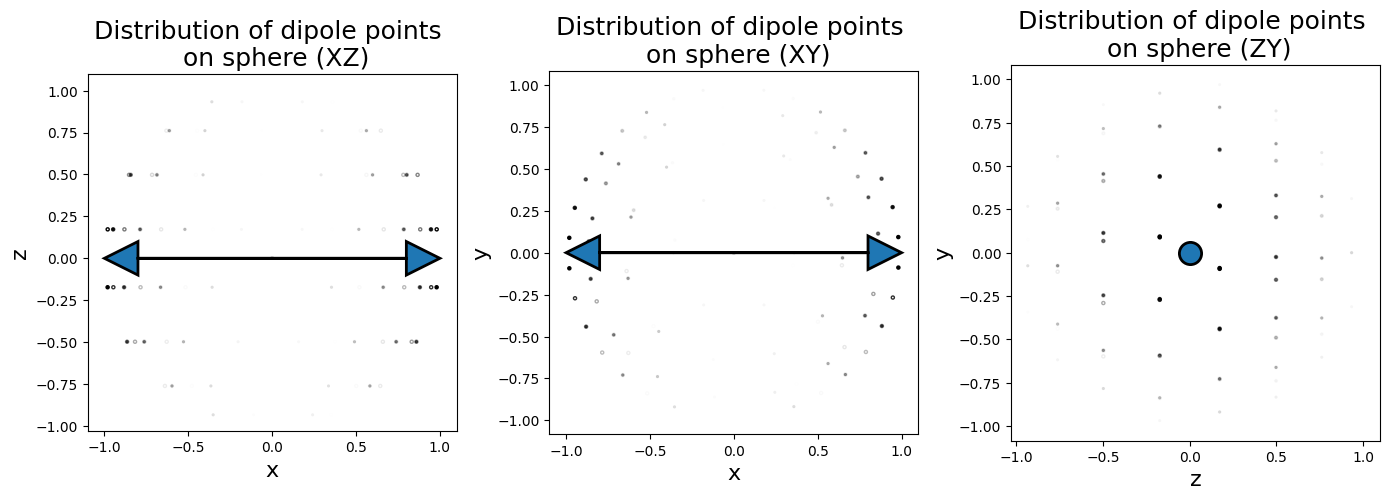

cap method area sum 2.960626914045443
expected area sum 3.5738661731158983


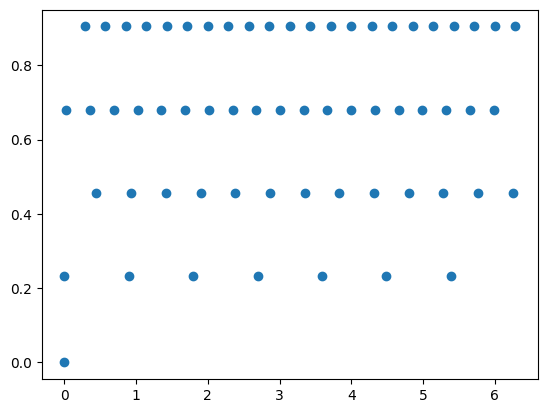

n_dipoles 99
n_rays 62
pvec shape (99, 1, 3)
nvec shape (1, 62, 3)
(99, 62, 3, 1)
(99, 1, 1, 1)
initial energy shape ()
cap method area sum 5.585218101594617
expected area sum 6.283185307179586
n_dipoles 99
n_rays 113
pvec shape (99, 1, 3)
nvec shape (1, 113, 3)
(99, 113, 3, 1)
(99, 1, 1, 1)
initial energy shape ()
n rays 2pi =  113
(62, 3, 1)
n rays =  62
NA area vs real area? 2.960626914045443 3.5738661731158983
half_sphere_energy 1.3185058830243208
initial_energy 0.7450254297378185
rays when NA scaled up to hemisphere 131.57939191765215
initialisation time in system 0.146382s
Curved pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000002699EA03940>
CURVED REFRACTION
max rho curved 0.0023588384884424647
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000269F716E670>
max rho flat 0.003137255189628478
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000002699EA03E80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT: <opmsim.optical_elements.SineLe

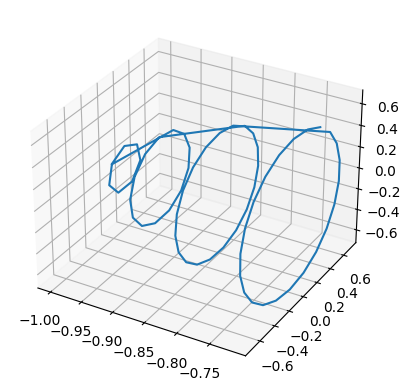

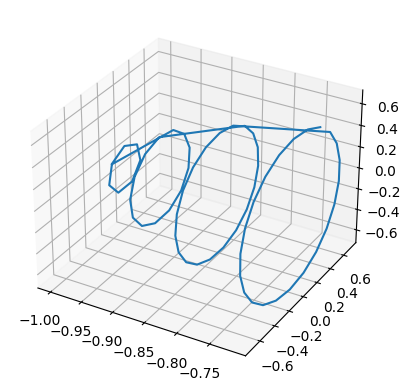

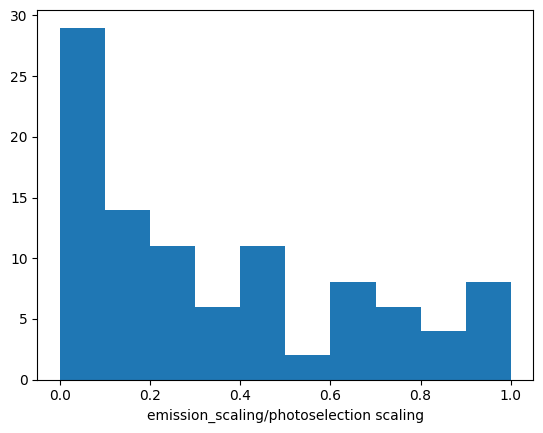

Limiting radius for detector: 0.9022556390977443
Energy ratio (efficiency): 0.2286890919359983
Total energy per dipole per ray: 0.1703791889959686
Energy from Ix 0.9308338503593404
Energy from Iy 1.5935940021175479
X/Y energy ratio = 0.5841097852542492
Half sphere energy 1.3185058830243208
Initial energy 0.7450254297378185
half sphere energy NA 0.6989170221471838
(16, 3, 1)
dotp (16, 1)
Error in I dot product too!
[[0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]
 [0.02902907]]
max dot prod error [0.02902907]
k_vec [[[ 2.36872390e-17]
  [ 5.66065711e-17]
  [ 1.00000000e+00]]

 [[-2.46959388e-17]
  [-8.47790351e-17]
  [ 1.00000000e+00]]

 [[ 8.44566428e-17]
  [-6.34302530e-18]
  [ 1.00000000e+00]]

 [[-1.81567332e-17]
  [-4.81709873e-17]
  [ 1.00000000e+00]]

 [[-2.73045991e-17]
  [ 1.01602556e-16]
  [ 1.00000000e+00]]

 [[ 2.203

C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\trace_system.py:137: UserWarning: Iz is non zero in ray's frame!
  warnings.warn("Iz is non zero in ray's frame!")


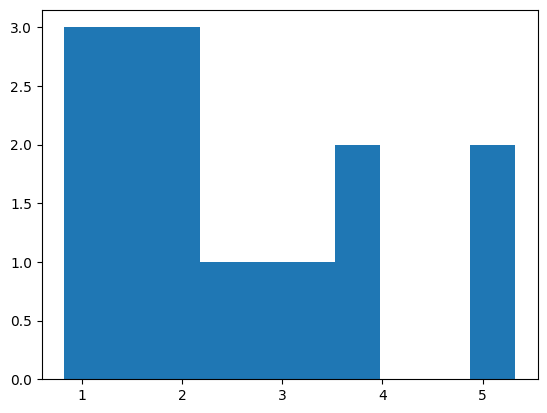

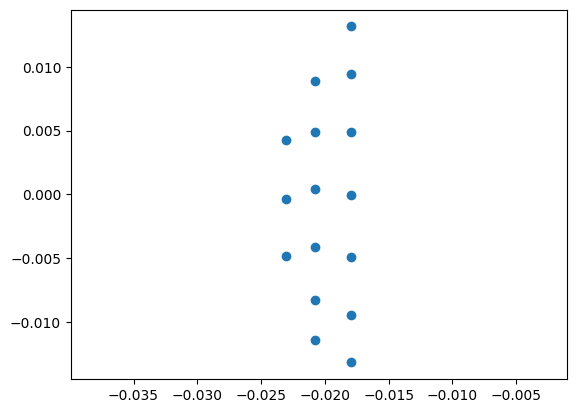

AUTOSCALING 5 TICKS


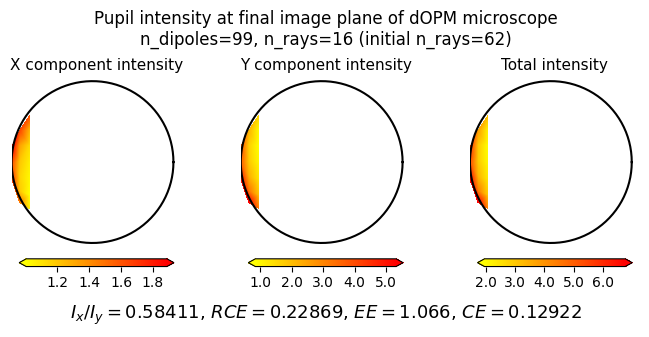

In [9]:
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
# %matplotlib widget

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 100

options = {
    'ray_count': 100
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True
}

opm_angle = 45*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
TL2 = optical_elements.SineLens(NA=1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33)
TL3 = optical_elements.SineLens(NA=1, focal_length=0.162, n=1)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle, 158e-6,\
    "../refractive_index_data/SiO2.txt", "../refractive_index_data/Ag.txt")

HWP1 = optical_elements.WavePlate(0, np.pi)  # into PBS
HWP2 = optical_elements.WavePlate(np.pi/2, np.pi)  # reflected out of PBS
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)

elements = [O1, TL1, TL2, O2, HWP1, QWP, AgSiO2_mirror, O2, QWP, HWP2, TL2]

source = dipole_source.DipoleSource()
source.generate_dipoles(dipole_count)
source.classical_photoselection((0,0))

system = OpticalSystem("dOPM system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)




In [ ]:
import optical_matrices

r_p, r_s = optical_matrices.compute_fresnel_protected_mirror(theta_i, n_film_complex, film_thickness, n_metal_complex, wavelength)
